<a href="https://colab.research.google.com/github/10dimensions/large-notebook-repository/blob/master/numerical_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math
import numpy as np

In [0]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

from scipy.constants import G

### Runge-Kutta 4th Order (RK4)

In [0]:
# Python program to implement Runge Kutta method 
# A sample differential equation "dy / dx = (x - y)/2" 
def dydx(x, y): 
    return ((x - y)/2) 

In [0]:
# Finds value of y for a given x using step size h 
# and initial value y0 at x0. 
def rungeKutta(x0, y0, x, h): 
    # Count number of iterations using step size or 
    # step height h 
    n = (int)((x - x0)/h)  
    # Iterate for number of iterations 
    y = y0 
    for i in range(1, n + 1): 
        "Apply Runge Kutta Formulas to find next value of y"
        k1 = h * dydx(x0, y) 
        k2 = h * dydx(x0 + 0.5 * h, y + 0.5 * k1) 
        k3 = h * dydx(x0 + 0.5 * h, y + 0.5 * k2) 
        k4 = h * dydx(x0 + h, y + k3) 
  
        # Update next value of y 
        y = y + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4) 
  
        # Update next value of x 
        x0 = x0 + h 
    return y 

In [24]:
# Test 1
x0 = 0
y = 1
x = 2
h = 0.2
print ("The value of y at x is: " + str( rungeKutta(x0, y, x, h) ))

The value of y at x is: 1.1036393232374955


In [0]:
# Test 2

def d_simple_pendulum(y, x):
  """ use time units omega*t->t
  dˆ2 u/dtˆ2 = - omegaˆ2 u is written as
  y = [u(t), du/dt]
  d y/dt = [du/dt, dˆ2u/dt = -u]
  Exact solution is y[0,1] = [xmax*sin(t), xmax*cos(t)]
  """
  return array([y[1],-y[0]])

RK Integrators can be used to simulate rocket trajectory, as it is primarily an ODE Solver.

Preodminantly used in interplanetary course-correction maneuvers, yet also finds applications in fluid dynamics.

### Ascent Vehicle Equations of Motion

#### Single Stage to Orbit Ascent Flight



At a simplified level, neglecting losses

Force, F = ṁ x c,

where ṁ = rate of change of mass (flow rate);
      c = relative velocity of engine exhaust

m x (dv/dt) = -c (dm/dt) - mg

=> dv = -c (dm/m) - g(dt)

v(t)
= -∫ c(h)
dm/m -∫g(h)dt; 

h(t)
= ∫v dt


####v - v0 = -c ln( m(t)/m0 )  - gt
----------------------

Adding the effect of Atmospheric Drag and Gravitational Losses,


####v - v0 = -c ln( m(t)/m0 )  - g/a0 (1 - m(t)/m0)
----------------------

Thrust-to-Weight Effect Representation, directly the depends the first co-efficient with a multiplier of [ 1/(T/W) ].

----------------------


Dynamic Pressure:
####q = 1/2 x ρ x (v^2)

ρ is atmospheric density relative to altitide,
v is velocity of vehicle



In [0]:
def calc_a(r):
    """Calculate the acceleration of the rocket due to gravity at position r."""
    r3 = np.hypot(*r)**3
    return -fac * r / r3

In [0]:
def get_trajectory(h, launch_speed, launch_angle):
    """Do the (very simple) numerical integration of the equation of motion.

    The satellite is released at altitude h (km) with speed launch_speed (km/s)
    at an angle launch_angle (degrees) from the normal to the planet's surface.

    """

    v0 = launch_speed
    theta = np.radians(launch_angle)

    N = 100000
    tgrid, dt = np.linspace(0, 15000, N, retstep=True)
    tr = np.empty((N,2))
    v = np.empty((N,2))
    # Initial rocket position, velocity and acceleration
    tr[0] = 0, R + h
    v[0] = v0 * np.sin(theta), v0 * np.cos(theta)
    a = calc_a(tr[0])

    for i, t in enumerate(tgrid[1:]):
        # Calculate the rocket's next position based on its instantaneous velocity.
        r = tr[i] + v[i]*dt
        if np.hypot(*r) < R:
            # Our rocket crashed.
            break
        # Update the rocket's position, velocity and acceleration.
        tr[i+1] = r
        v[i+1] = v[i] + a*dt
        a = calc_a(tr[i+1])

    return tr[:i+1]

In [0]:
def plot_trajectory(ax, tr):
    """Plot the trajectory tr on Axes ax."""
    earth_circle = Circle((0,0), R, facecolor=(0.9,0.9,0.9))
    ax.set_facecolor('k')
    ax.add_patch(earth_circle)
    ax.plot(*tr.T, c='y')
    # Make sure our planet looks circular!
    ax.axis('equal')

    # Set Axes limits to trajectory coordinate range, with some padding.
    xmin, xmax = min(tr.T[0]), max(tr.T[0])
    ymin, ymax = min(tr.T[1]), max(tr.T[1])
    dx, dy = xmax - xmin, ymax - ymin
    PAD = 0.05
    ax.set_xlim(xmin - PAD*dx, xmax + PAD*dx)
    ax.set_ylim(ymin - PAD*dy, ymax + PAD*dy)

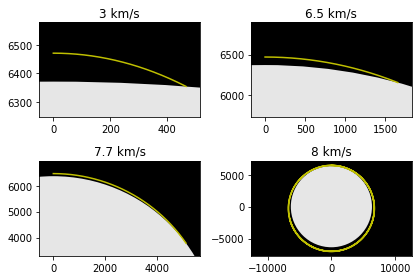

In [29]:

# Convert Newtonian constant of gravitation from m3.kg-1.s-2 to km3.kg-1.s-2
G /= 1.e9

# Planet radius, km
R = 6371
# Planet mass, kg
M = 5.9722e24

fac = G * M


# Rocket initial speed (km.s-1), angle from local vertical (deg)
launch_speed, launch_angle = 2, 90
# Rocket launch altitute (km)
h = 100
tr = get_trajectory(h, launch_speed, launch_angle)


fig, axes = plt.subplots(nrows=2, ncols=2)
for i, launch_speed in enumerate([3, 6.5, 7.7, 8]):
    tr = get_trajectory(h, launch_speed, launch_angle)
    ax = axes[i//2,i%2]
    plot_trajectory(ax, tr)
    ax.set_title('{} km/s'.format(launch_speed))
plt.tight_layout()

plt.savefig('orbit.png')
plt.show()

### Kepler's Equations

Kepler's equation gives the relation between the polar coordinates of a celestial body (such as a planet) and the time elapsed from a given initial point. Kepler's equation is of fundamental importance in celestial mechanics, but cannot be directly inverted in terms of simple functions in order to determine where the planet will be at a given time.

Let M be the mean anomaly (a parameterization of time) and E the eccentric anomaly (a parameterization of polar angle) of a body orbiting on an ellipse with eccentricity e, then


> M=E-e.sinE


For M not a multiple of pi, Kepler's equation has a unique solution, but is a transcendental equation and so cannot be inverted and solved directly for E given an arbitrary M. 

Some of the techniques include:

- Writing E as power series of e, where coefficients are given by Lagrange inverse theorem.

- A series solution in Bessel function of the first kind. This series converges for all e<1 like a geometric series

- And Iterative methods such as Newton's method

In [0]:
def EccAnom(ec,m,dp):

  # arguments:
  # ec=eccentricity, m=mean anomaly,
  # dp=number of decimal places

  pi=math.pi
  K=pi/180.0

  maxIter=30
  i=0;

  delta=math.pow(10,-dp)

  E=None
  F=None

  m=m/360.0

  m=2.0*pi*(m-math.floor(m))

  if (ec<0.8): 
    E=m
  else:
    E=pi

  F = E - ec*math.sin(m) - m

  while ( (abs(F)>delta) and (i<maxIter) ):

    E = E - F/(1.0-ec*math.cos(E))
    F = E - ec*math.sin(E) - m

    i = i + 1



  E=E/K

  return round(E*math.pow(10,dp))/math.pow(10,dp)


In [0]:
def TrueAnom(ec,E,dp):

  K=math.pi/180.0;
  S=math.sin(E);

  C=Math.cos(E);

  fak=math.sqrt(1.0-ec*ec);

  phi=math.atan2(fak*S,C-ec)/K;

  return round(phi*math.pow(10,dp))/math.pow(10,dp);

In [0]:
def position(a, ec,E):

  # a=semimajor axis, ec=eccentricity, E=eccentric anomaly
  # x,y = coordinates of the planet with respect to the Sun

  C = math.cos(E);
  S = math.sin(E);
  x = a*(C-ec);
  y = a*math.sqrt(1.0-ec*ec)*S;

In [18]:
#Test Case 1

M = np.deg2rad(120)
e = 0.9

E = EccAnom(e, M, 1)

print (E)

31.3
